In [21]:
# Importing necessary modules

import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

In [22]:
# Reference data for the pristine C60 structure

# Potential energy = -415.94288 eV
# Number of 5-membered carbon rings = 12
# Number of 6-membered carbon rings = 20
# Distance of the first peak of radial distribution function (RDF) for the 5-memebered carbon rings = 3.53 A
# Distance of the first peak of radial distribution function (RDF) for the 5 and 6-memebered carbon rings = 2.13 A
# Distance of the first peak of radial distribution function (RDF) for the 6-memebered carbon rings = 2.33 A

In [23]:
# Reading our data repository

dataBase = pd.read_csv('absoluteTotalAveragedData1.txt', sep = '\t')
print (dataBase.head())
print (dataBase.shape)

   abs_diff_pe  abs_diff_rings  abs_diff_rdf
0     11.00966             0.0      0.620000
1     14.99403             1.0      0.626667
2     14.63772             0.0      0.613333
3     13.97819             0.0      0.680000
4     14.47451             0.0      0.600000
(8925, 3)


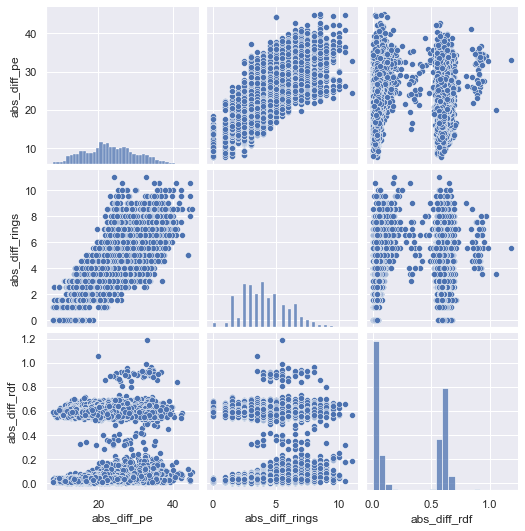

In [24]:
# Performing a pairplot to study the correlation of data

sns.pairplot(dataBase)

For n_clusters = 2 The average silhouette_score is : 0.5407507818784323


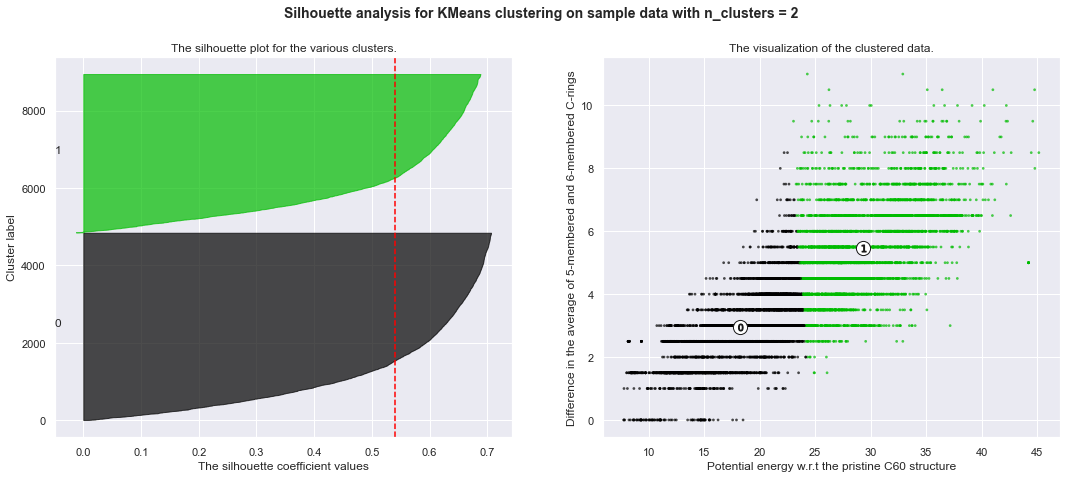

In [25]:
# Using silhouette and KMeans analysis on our dataBase

#X = dataBase
X = dataBase[['abs_diff_pe', 'abs_diff_rings']]
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    #myFile = open('clusterLabels.txt', 'w')
    #for i in cluster_labels:
    #    myFile.write(str(i) + '\n')
    #myFile.close()
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Potential energy w.r.t the pristine C60 structure")
    ax2.set_ylabel("Difference in the average of 5-membered and 6-membered C-rings")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5618468970365583


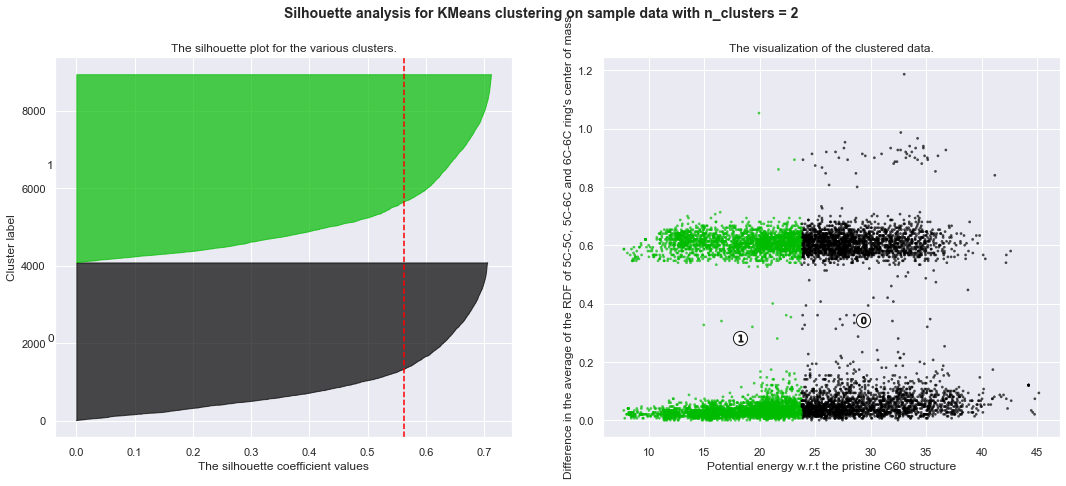

In [26]:
# Using silhouette and KMeans analysis on our dataBase

#X = dataBase
X = dataBase[['abs_diff_pe', 'abs_diff_rdf']]
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    #myFile = open('clusterLabels.txt', 'w')
    #for i in cluster_labels:
    #    myFile.write(str(i) + '\n')
    #myFile.close()
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Potential energy w.r.t the pristine C60 structure")
    ax2.set_ylabel("Difference in the average of the RDF of 5C-5C, 5C-6C and 6C-6C ring's center of mass")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5554317812047261


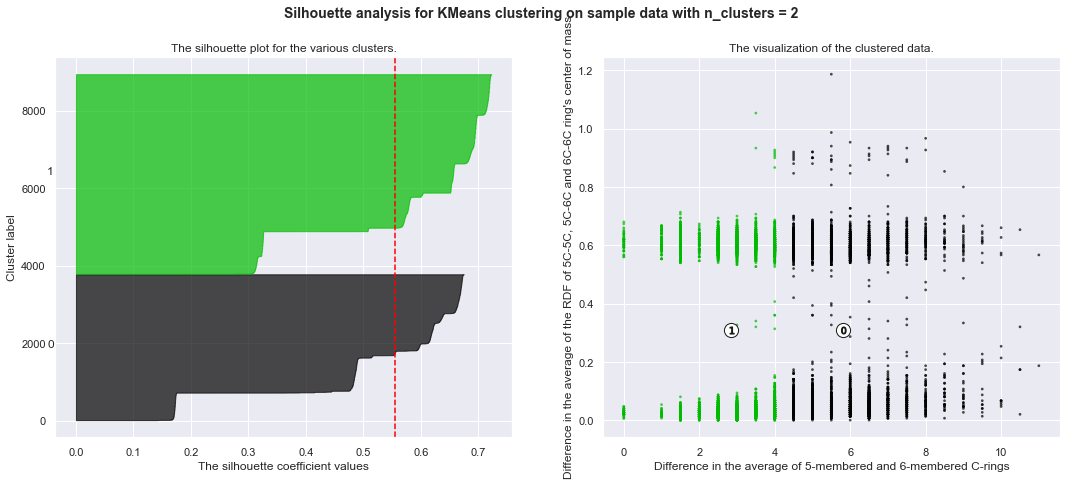

In [27]:
# Using silhouette and KMeans analysis on our dataBase

#X = dataBase
X = dataBase[['abs_diff_rings', 'abs_diff_rdf']]
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    myFile = open('clusterLabels.txt', 'w')
    for i in cluster_labels:
        myFile.write(str(i) + '\n')
    myFile.close()
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    cluster0Values = []
    cluster1Values = []
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        if (i == 0):
            cluster0Values.append(ith_cluster_silhouette_values)
        if (i == 1):
            cluster1Values.append(ith_cluster_silhouette_values)
            
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Difference in the average of 5-membered and 6-membered C-rings")
    ax2.set_ylabel("Difference in the average of the RDF of 5C-5C, 5C-6C and 6C-6C ring's center of mass")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [28]:
actualFile = open('absoluteTotalAveragedData.txt', 'r')
actualFileData = actualFile.readlines()
actualValuesDiffPe = []
actualValuesDiffRings = []
actualValuesDiffRDF = []
for i in actualFileData:
    a = i.strip('\n')
    b = a.split()
    absDiffPe = float(b[0])
    absDiffRings = float(b[1])
    absDiffRDF = float(b[2])
    actualValuesDiffPe.append(str(absDiffPe))
    actualValuesDiffRings.append(str(absDiffRings))
    actualValuesDiffRDF.append(str(absDiffRDF))
clusterLabelFile = open('clusterLabels.txt', 'r')
clusterLabelFileData = clusterLabelFile.readlines()
labeledFile = open('labeledFile.txt', 'w')
counter = 0
for i in clusterLabelFileData:
    a = i.strip('\n')
    b = a.split()
    label = b[0]        
    labeledFile.write(str(actualValuesDiffPe[counter]) + '\t' + str(actualValuesDiffRings[counter]) + '\t' + str(actualValuesDiffRDF[counter]) + '\t' + str(label) + '\n')
    counter = counter + 1  
    
labeledFile.close()

In [30]:
myFile = open('labeledFile.txt', 'r')
myFileLines = myFile.readlines()

goodFile = open('goodFile.txt', 'w')
badFile = open('badFile.txt', 'w')

for i in myFileLines:
    a = i.strip()
    b = a.split()
    pe = b[0]
    rings = b[1]
    rdf = b[2]
    label = b[3]
    if (label == '0'):
        goodFile = open('goodFile.txt', 'a')
        goodFile.write(str(pe) + '\t' + str(rings) + '\t' + str(rdf) + '\n')
        goodFile.close()
    else:
        badFile = open('badFile.txt', 'a')
        badFile.write(str(pe) + '\t' + str(rings) + '\t' + str(rdf) + '\n')
        badFile.close()

print ('Done!')

Done!
